### KDSH

In [ ]:
### Keras and Tensorflow >2.0

In [ ]:
import pandas as pd

In [ ]:
df01=pd.read_csv('/content/btc_1h.csv')
df2=pd.read_csv('/content/btc_2h.csv')
df3=pd.read_csv('/content/btc_3m.csv')
df4=pd.read_csv('/content/btc_4h.csv')
df5=pd.read_csv('/content/btc_5m.csv')
df6=pd.read_csv('/content/btc_6h.csv')
df7=pd.read_csv('/content/btc_15m.csv')
df8=pd.read_csv('/content/btc_30m.csv')

In [ ]:
df = pd.concat([df01, df2, df3, df4, df5, df6, df7], ignore_index=True)

In [ ]:
df.head()

,datetime,open,high,low,close,volume
0,2018-01-01 05:30:00,13715.65,13715.65,13400.01,13529.01,443.356199
1,2018-01-01 06:30:00,13528.99,13595.89,13155.38,13203.06,383.697006
2,2018-01-01 07:30:00,13203.00,13418.43,13200.00,13330.18,429.064572
3,2018-01-01 08:30:00,13330.26,13611.27,13290.00,13410.03,420.087030
4,2018-01-01 09:30:00,13434.98,13623.29,13322.15,13601.01,340.807329


In [ ]:
df.tail()

,datetime,open,high,low,close,volume
651400,2022-01-31 03:30:00,37729.00,37799.99,37633.55,37684.68,346.12537
651401,2022-01-31 04:00:00,37684.69,37855.54,37625.41,37785.78,388.53318
651402,2022-01-31 04:30:00,37785.78,38230.00,37778.46,38060.25,1268.40875
651403,2022-01-31 05:00:00,38060.24,38088.44,37870.00,37881.76,460.40305
651404,2022-01-31 05:30:00,37881.75,37951.07,37640.98,37676.00,698.60830


In [ ]:
df1=df.reset_index()['close']

In [ ]:
df1

0         13529.01
1         13203.06
2         13330.18
3         13410.03
4         13601.01
            ...   
651400    37684.68
651401    37785.78
651402    38060.25
651403    37881.76
651404    37676.00
Name: close, Length: 651405, dtype: float64

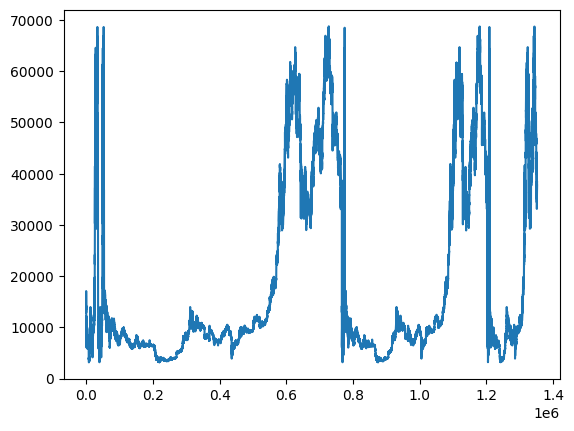

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [ ]:
import numpy as np

In [ ]:
df1

0         13529.01
1         13203.06
2         13330.18
3         13410.03
4         13601.01
            ...   
651400    37684.68
651401    37785.78
651402    38060.25
651403    37881.76
651404    37676.00
Name: close, Length: 651405, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[0.15807679]
 [0.1531058 ]
 [0.15504448]
 ...
 [0.53219737]
 [0.52947526]
 [0.52633726]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(878694, 473143)

In [ ]:
train_data

array([[0.15807679],
       [0.1531058 ],
       [0.15504448],
       ...,
       [0.71263639],
       [0.71655538],
       [0.71422094]])

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(423312, 100)
(423312,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(227891, 100)
(227891,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
pip install tensorflow

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=10,batch_size=64,verbose=1)

Epoch 1/100
13729/13729 [==============================] - 3001s 218ms/step - loss: 5.4677e-05 - val_loss: 4.3062e-06
Epoch 2/100
13729/13729 [==============================] - 3097s 226ms/step - loss: 6.0553e-06 - val_loss: 0.0013
Epoch 3/100
13729/13729 [==============================] - 3138s 229ms/step - loss: 4.9286e-06 - val_loss: 1.7116e-05
Epoch 4/100
13729/13729 [==============================] - 3128s 228ms/step - loss: 4.2378e-06 - val_loss: 6.2515e-05
Epoch 5/100
13729/13729 [==============================] - 3072s 224ms/step - loss: 3.9914e-06 - val_loss: 3.4765e-06
Epoch 6/100
 1553/13729 [==>...........................] - ETA: 38:41 - loss: 3.2891e-06

KeyboardInterrupt: 

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.1.0'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

14783/14783 [==============================] - 672s 45ms/step


In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

24503.44595351909

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

28373.566796031424

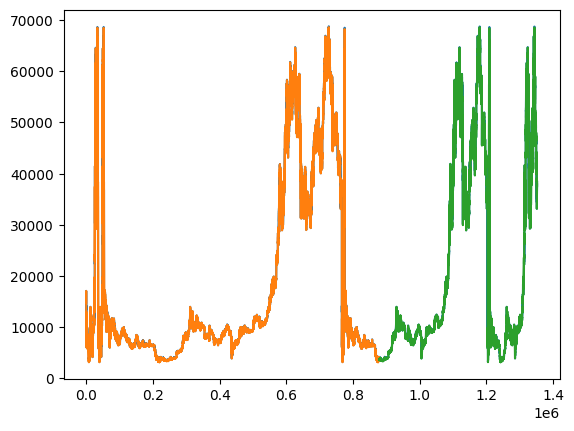

In [ ]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

473143

In [ ]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 472802)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

0 day input [0.01032243 0.01015583 0.0100979  ... 0.53041627 0.52922565 0.52656898]


ValueError: cannot reshape array of size 472801 into shape (1,100,1)

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

1258

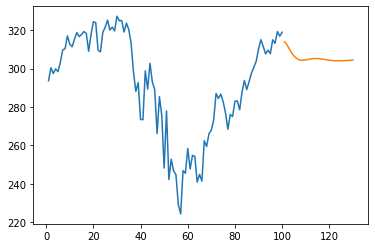

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

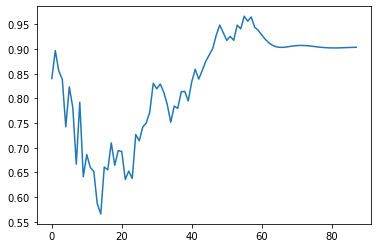

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

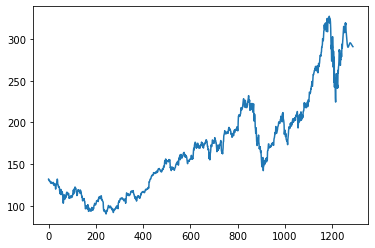

In [ ]:
plt.plot(df3)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [ ]:
X = df.iloc[:,df.columns != 'close']
Y = df.iloc[:,-2]

In [ ]:
X['datetime'] = pd.to_datetime(X['datetime'], infer_datetime_format=True)

<ipython-input-8-a4c199b15a1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['datetime'] = pd.to_datetime(X['datetime'], infer_datetime_format=True)


In [ ]:
X['datetime'] = X['datetime'].dt.date

<ipython-input-9-603fecaef96d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['datetime'] = X['datetime'].dt.date


In [ ]:
X['datetime'] = X['datetime'].map(lambda x: int(x.strftime('%Y%m%d')))

<ipython-input-10-570125450501>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['datetime'] = X['datetime'].map(lambda x: int(x.strftime('%Y%m%d')))


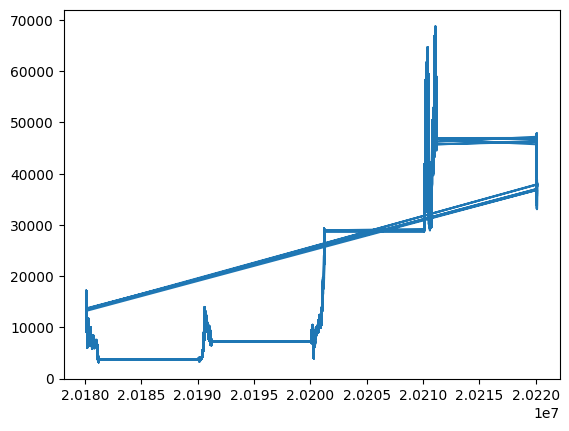

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X['datetime'], Y)

In [ ]:
import numpy as np
X = np.array(X)
Y = np.array(Y)

In [ ]:
X

array([[2.01801010e+07, 1.37156500e+04, 1.37156500e+04, 1.34000100e+04,
        4.43356199e+02],
       [2.01801010e+07, 1.35289900e+04, 1.35958900e+04, 1.31553800e+04,
        3.83697006e+02],
       [2.01801010e+07, 1.32030000e+04, 1.34184300e+04, 1.32000000e+04,
        4.29064572e+02],
       ...,
       [2.02201310e+07, 3.80602400e+04, 3.80884400e+04, 3.78755800e+04,
        2.88104410e+02],
       [2.02201310e+07, 3.79598700e+04, 3.79598800e+04, 3.78700000e+04,
        1.72298640e+02],
       [2.02201310e+07, 3.78817500e+04, 3.79510700e+04, 3.76568900e+04,
        4.83564600e+02]])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=101);

In [ ]:
scaler = StandardScaler().fit(X_train)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [ ]:
y_pred = lm.predict(X)

In [ ]:
x_axis = df['datetime']
x_axis = pd.to_datetime(x_axis, infer_datetime_format=True)
x_axis = x_axis.dt.date

In [ ]:
Y_train
y_pred

array([56969.35628544, 51924.31460071,  6709.96495447, ...,
        6357.39286686, 10363.28439461,  6729.93637053])

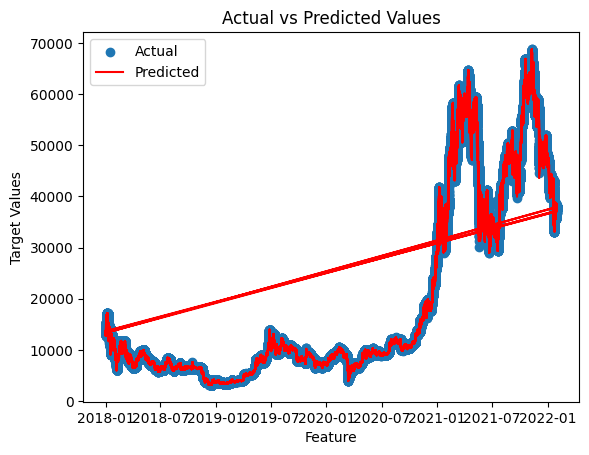

In [ ]:
import matplotlib.pyplot as plt

# Assuming X_train[0] is a feature, Y_train is the actual target values, and y_pred is the predicted values
plt.scatter(x_axis, df['close'], label='Actual')
plt.plot(x_axis, y_pred, color='red', label='Predicted')
plt.xlabel('Feature')
plt.ylabel('Target Values')
plt.legend()
plt.title('Actual vs Predicted Values')
plt.show()


In [ ]:
#Calculate scores for model evaluation
scores = f'''
{'Metric'.ljust (10)}{'Train'.center (20)}{'Test'.center(20)}
{'r2_score'.ljust (10)}{r2_score (Y_train, lm.predict(X_train))}\t{r2_score (Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse (Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}'''
print(scores)


Metric           Train                Test        
r2_score  0.9999940372427745	0.9999939479910149 
MSE       1903.0643237129727	1935.5117605437265
